In [26]:

!pip install --upgrade cryptography mysql-connector-python sqlalchemy pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
database = "moviesdb"
username = "root"
password = "root"
host = "localhost"
port = "3306"

In [3]:
db_uri = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(db_uri)

In [5]:
tables = pd.read_sql_table("movies", engine)

In [6]:
tables

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5
5,106,Sholay,Bollywood,1975,8.1,United Producers,1
6,107,Dilwale Dulhania Le Jayenge,Bollywood,1995,8.0,Yash Raj Films,1
7,108,3 Idiots,Bollywood,2009,8.4,Vinod Chopra Films,1
8,109,Kabhi Khushi Kabhie Gham,Bollywood,2001,7.4,Dharma Productions,1
9,110,Bajirao Mastani,Bollywood,2015,7.2,,1


In [7]:
import vanna as vn
from vanna.remote import VannaDefault

In [8]:
api_key = "1cdce4ff500d4205b6045ab5f2169a46"
vanna_model_name = "movied_db_practice"

In [9]:
vn = VannaDefault(model = vanna_model_name,api_key = api_key)

In [10]:
vn.get_models()

['movied_db_practice']

In [11]:
vn.connect_to_mysql(host = host,dbname = database,user=username,password=password,port=3306)

In [12]:
df_movies = vn.run_sql("select * from information_schema.columns where TABLE_SCHEMA = 'moviesdb'")

In [13]:
plan = vn.get_training_plan_generic(df_movies)
plan

Train on Information Schema: def.moviesdb actors
Train on Information Schema: def.moviesdb financials
Train on Information Schema: def.moviesdb languages
Train on Information Schema: def.moviesdb movie_actor
Train on Information Schema: def.moviesdb movies

In [14]:
vn.train(plan = plan)

In [15]:
vn.train(documentation='''You have access to the following SQL tables:
movies: Contains information about movies including title, industry, release year, IMDb rating, studio, and language.
actors: Stores data on actors such as their names and birth years.
movie_actor: Establishes a many-to-many relationship between movies and actors by linking actor IDs with movie IDs.
financials: Holds financial data related to movies including budget, revenue, unit, and currency.
languages: Contains information about different languages used in movies, assigning a unique ID to each language.
Using these tables and their relationships, perform the necessary joins to answer the following questions.''')

Adding documentation....


'1080081-doc'

In [12]:
vn.train(documentation='''When using financial tables, ensure you also consider the 'unit' column, which specifies the unit of currency. For example, if the budget is listed as 100 and the unit is 'Billions,' this signifies 100 Billions dollars. Therefore, when determining the top-budget movies, consider both the budget value and the associated unit.''')

Adding documentation....


'1080419-doc'

SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nYou have access to the following SQL tables:\nmovies: Contains information about movies including title, industry, release year, IMDb rating, studio, and language.\nactors: Stores data on actors such as their names and birth years.\nmovie_actor: Establishes a many-to-many relationship between movies and actors by linking actor IDs with movie IDs.\nfinancials: Holds financial data related to movies including budget, revenue, unit, and currency.\nlanguages: Contains information about different languages used in movies, assigning a unique ID to each language.\nUsing these tables and their relationships, perform the necessary joins to answer the following questions.\n\nYou have access to the following SQL tables:\nmovies: Co

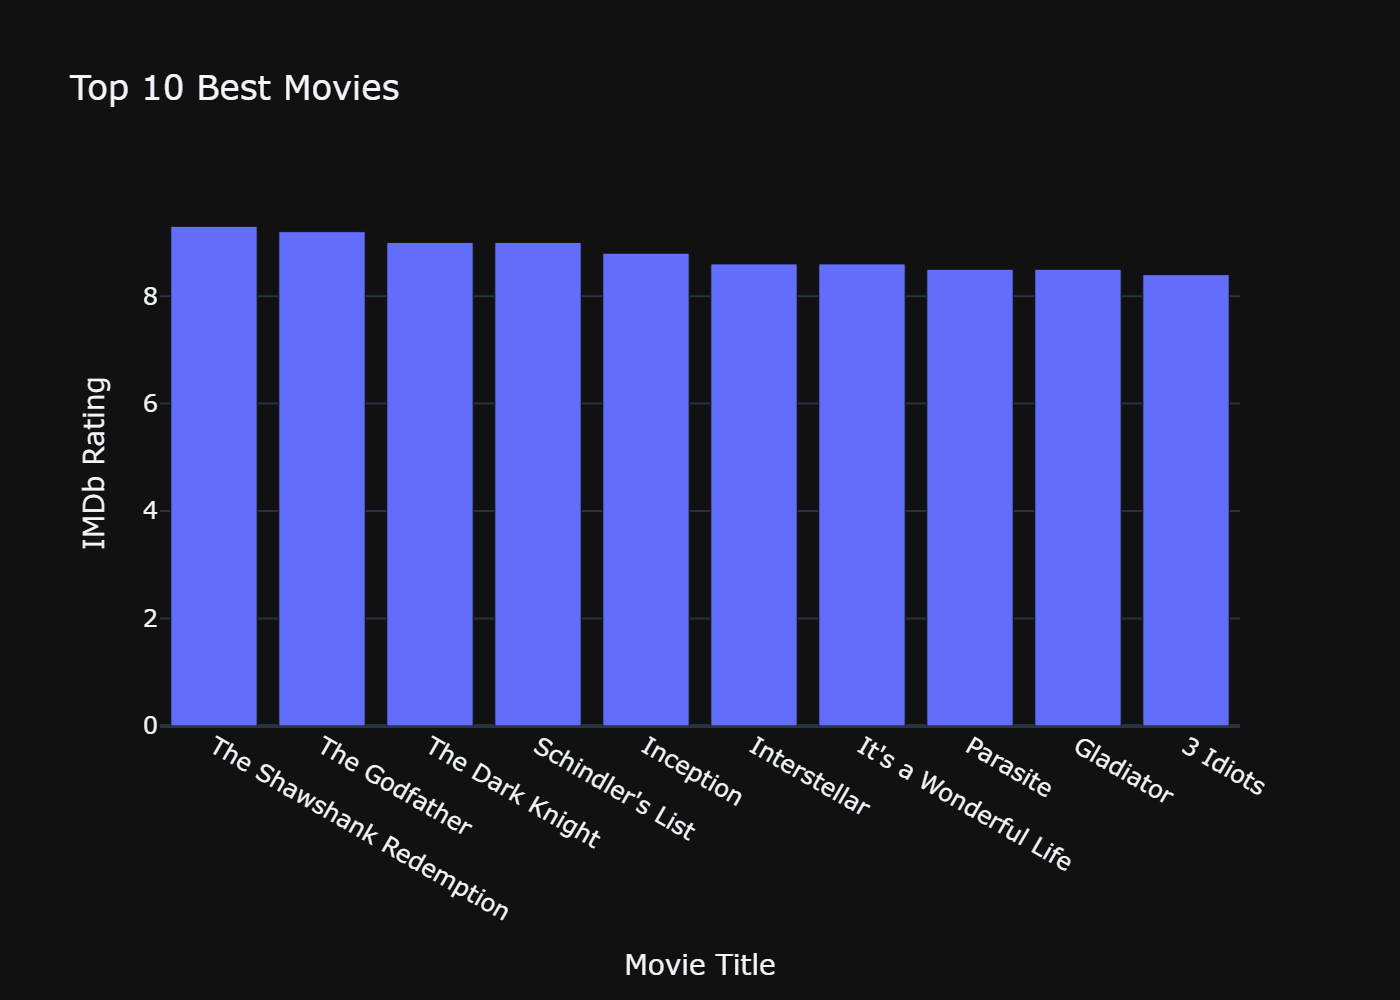

('SELECT title, imdb_rating\nFROM movies\nORDER BY imdb_rating DESC\nLIMIT 10;',
                       title imdb_rating
 0  The Shawshank Redemption         9.3
 1             The Godfather         9.2
 2           The Dark Knight         9.0
 3          Schindler's List         9.0
 4                 Inception         8.8
 5              Interstellar         8.6
 6     It's a Wonderful Life         8.6
 7                  Parasite         8.5
 8                 Gladiator         8.5
 9                  3 Idiots         8.4,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Movie Title=%{x}<br>IMDb Rating=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': a

In [16]:
vn.ask("What are top 10 best movies?")

In [ ]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
